In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# Load the CSV file
data = pd.read_csv('latitude_longitude_details.csv')



In [36]:
# Function to detect outliers
def detect_outliers(data):
    diffs = np.diff(data, axis=0)
    dists = np.linalg.norm(diffs, axis=1)
    threshold = np.mean(dists) + 2 * np.std(dists)
    outliers = np.where(dists > threshold)[0] + 1
    return outliers


In [37]:
# Detect outliers
coordinates = data[['latitude', 'longitude']].values
outliers = detect_outliers(coordinates)


In [38]:
# Correct the outliers
for idx in outliers:
    if idx == 0 or idx == len(coordinates) - 1:
        continue
    coordinates[idx] = (coordinates[idx - 1] + coordinates[idx + 1]) / 2


In [39]:
# Save corrected coordinates to a new CSV file
corrected_data = pd.DataFrame(coordinates, columns=['latitude', 'longitude'])
corrected_data.to_csv('corrected_latitude_longitude_details.csv', index=False)


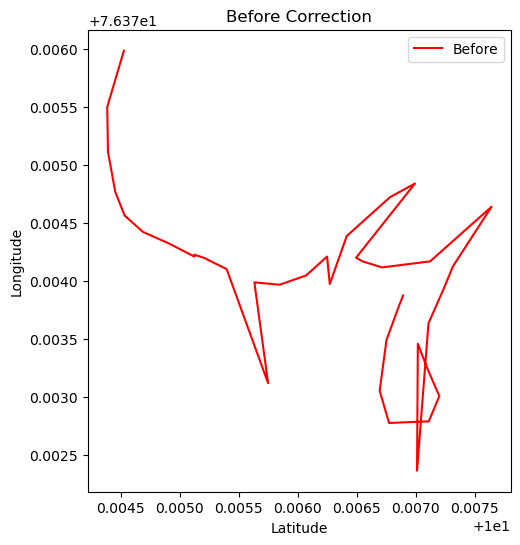

In [40]:
# Plot before and after
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data['latitude'], data['longitude'], 'r-', label='Before')
plt.title('Before Correction')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()



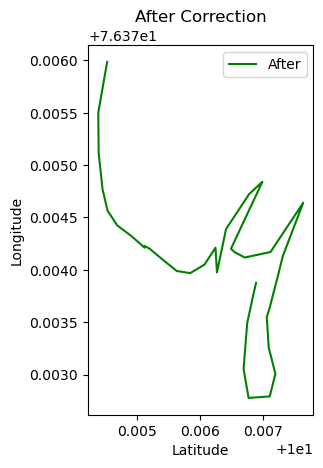

In [41]:
plt.subplot(1, 2, 2)
plt.plot(corrected_data['latitude'], corrected_data['longitude'], 'g-', label='After')
plt.title('After Correction')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()


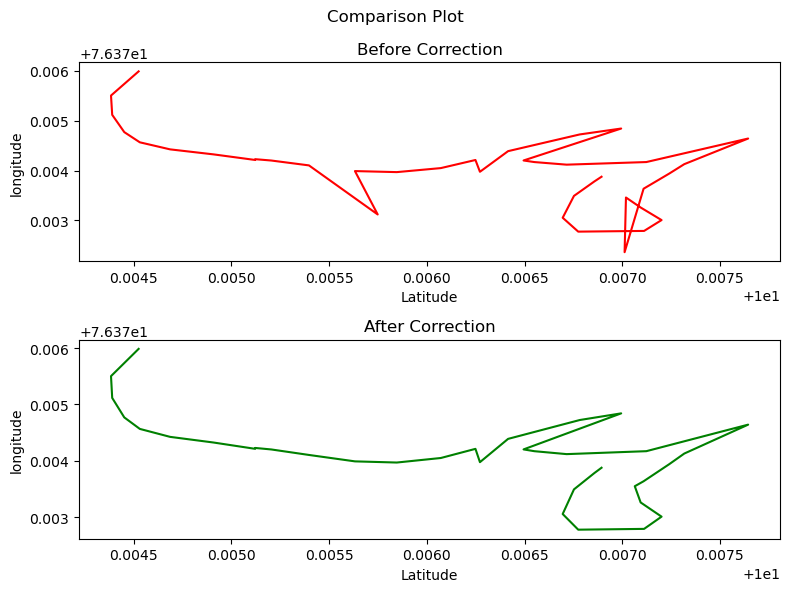

In [42]:
#save the comparision
fig=plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


#plt.subplot(1, 2, 1)
ax1.plot(data['latitude'], data['longitude'], 'r-', label='Before')
ax1.set_title('Before Correction')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('longitude')
ax2.plot(corrected_data['latitude'], corrected_data['longitude'], 'g-', label='After')
ax2.set_title('After Correction')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('longitude')
plt.suptitle('Comparison Plot')
fig.tight_layout()
fig.savefig('comparison_plot.png')